In [12]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def link_generator(url):
    page = url
    page_base = page[:-1]
    links = []
    # generating links fpr different Review Pages
    for link in range(1,10):
        links.append(page_base+str(link))
    return links

#function to scrape Data
def Scrape(links):
    
    stars = []
    content = []
    titles = []
    
    for page in links:
        r = requests.get(page)
        soup = BeautifulSoup(r.text, 'html.parser')
        for star in soup.find_all('div', class_='ebay-review-section-l'): 
            stars.append(star.find('span','star-rating')['aria-label'])
            #logging
            # print(f"appending{star} ")
        
        for review_content in soup.find_all('p', class_ = 'review-item-content rvw-wrap-spaces'): 
            content.append(review_content.text)
            #logging
            # print(f"appending{review_content} ")
    
        for review_title in soup.find_all('h3', class_ = 'review-item-title rvw-nowrap-spaces'): 
            titles.append(review_title.text)
            #logging
            # print(f"appending{review_title} ")
            
    return stars, content, titles

In [14]:
df = []
df = pd.DataFrame(df)

In [15]:
url = 'https://www.ebay.com/urw/Apple-HomePod-mini-Smart-Speaker-Space-Gray/product-reviews/242647970?_itm=354982116782&pgn=1'
links = link_generator(url)

In [16]:
stars, content, titles = Scrape(links) 

In [17]:
df['Review Title'] = titles
df['Review Content'] = content
df['Stars'] = stars


In [18]:
df.head(10)


,Review Title,Review Content,Stars
0,Perfect Bridge to view security cameras remote...,Rather than purchasing Arlo remote viewing se...,5 stars
1,Poor sound quality,I have a new one directly from apple the store...,1 stars
2,Easy set up. easy to use. Get 2 for stereo,I play it mostly as low level background but i...,5 stars
3,"Great product, Sounds awesome, looks brand new...",HomePod was in good shape. Opening the package...,5 stars
4,"Homebod, is just not another fancy speaker.. i...",very nice to have such product in home..I thou...,5 stars
5,Apple HomePod - A Great Speaker!,I have a Samsung smart TV but the sound is abs...,5 stars
6,The best shop,I already had two HomePods (1 in living room a...,5 stars
7,Great sound in a small form,"The original HomePod is expensive, but I would...",5 stars
8,Rich sound in a small package....,Bought this speaker for a very small home offi...,5 stars
9,Excellent product / excellent seller,The HomePod is amazing. This is my second one ...,5 stars


In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\huzai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:

df['Combined Review'] = df['Review Title'] + ' ' + df['Review Content']
sid = SentimentIntensityAnalyzer()
df['Sentiment Combined'] = df['Combined Review'].apply(lambda x: sid.polarity_scores(x)['compound'])
# print(df)
df.to_csv("Combined Reviews.csv")
# print(df[['Review Title', 'Review Content', 'Sentiment Combined']])
# df.to_csv("testDataset.csv")

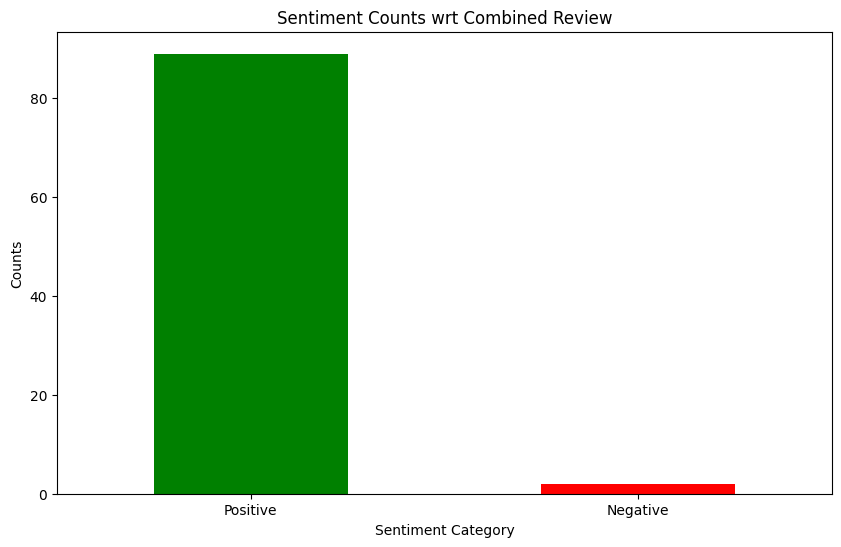

In [21]:
conditions_combined = [
    (df['Sentiment Combined'] > 0),
    (df['Sentiment Combined'] == 0),
    (df['Sentiment Combined'] < 0)
]

choices = ['Positive', 'Neutral', 'Negative']
df['Sentiment_Category_Combined'] = np.select(conditions_combined, choices, default='Neutral')
sentiment_counts_Combined = df['Sentiment_Category_Combined'].value_counts()

# Plot the sentiment wrt Combined Review in a bar graph
plt.figure(figsize=(10, 6))
sentiment_counts_Combined.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts wrt Combined Review')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

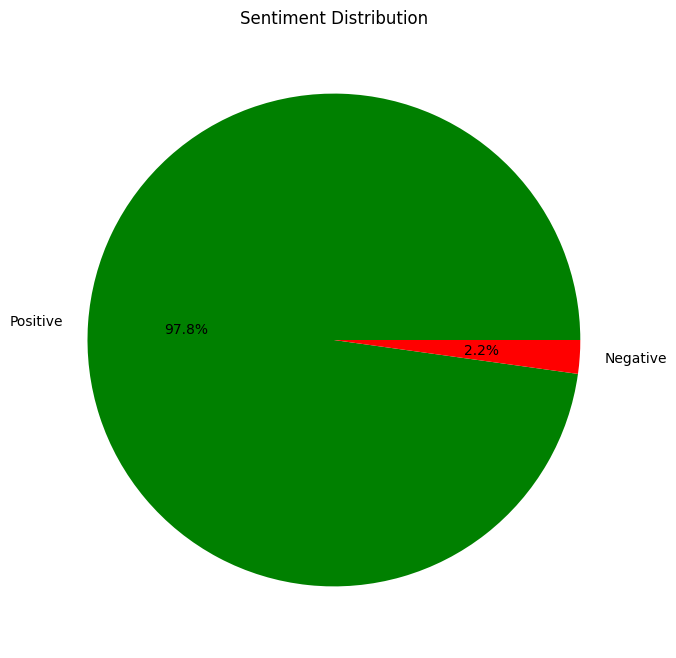

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_Combined, labels=sentiment_counts_Combined.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()
